<a href="https://colab.research.google.com/github/athun001/PytorchProjects/blob/master/Adv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%%writefile datasets.py
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# modelName: lenet, vgg, resnet

def GetTransform(mnist, modelName):
  if mnist is True:
    if modelName == "lenet":
      train_transform=transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]) #Source: pytorch website
      test_transform=transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]) #Source: pytorch website
      return train_transform, test_transform
    if modelName == "vgg":
      train_transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])
      test_transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])
      return train_transform, test_transform
    if modelName == "resnet":
      return transforms.Compose([transforms.ToTensor()]), transforms.Compose([transforms.ToTensor()])
  else:
    if modelName == "lenet":
      train_transform = transforms.Compose([transforms.ToTensor()])
      test_transform = transforms.Compose([transforms.ToTensor()])
      return train_transform, test_transform
    if modelName == "vgg":
      train_transform = transforms.Compose([transforms.ToTensor()])
      test_transform = transforms.Compose([transforms.ToTensor()])
      return train_transform, test_transform
    if modelName == "resnet":
      train_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))])
      test_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))])
      return train_transform, test_transform


def GetTransformScenario(mnist, modelName, scenario):
  if mnist is True:
    if modelName == "lenet":
      if scenario == 1:
        train_transform=transforms.Compose([transforms.RandomRotation(20),transforms.Resize((32, 32)), transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]) #Source: pytorch website
      if scenario == 2:
        train_transform=transforms.Compose([transforms.RandomHorizontalFlip(0.5),transforms.Resize((32, 32)), transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]) #Source: pytorch website
      test_transform=transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]) #Source: pytorch website
      return train_transform, test_transform
  else:
    if modelName == "resnet":
      if scenario == 1:
        train_transform=transforms.Compose([transforms.RandomRotation(20),transforms.ToTensor(), transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))]) #Source: pytorch website
      if scenario == 2:
        train_transform=transforms.Compose([transforms.RandomHorizontalFlip(0.5),transforms.ToTensor(), transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))]) #Source: pytorch website

      test_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))])
      return train_transform, test_transform


def GetDataLoaders(mnist=True, modelName="lenet", batch_size=32, num_workers=2, scenario=0):
  if scenario == 0:
    train_transform, test_transform = GetTransform(mnist, modelName)
  else:
    train_transform, test_transform = GetTransformScenario(mnist, modelName, scenario)
  if mnist is True:
    train_dataset = datasets.MNIST(root="./data/", train=True, download=True, transform=train_transform)
    test_dataset = datasets.MNIST(root="./data/", train=False, download=True, transform=test_transform)
    train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True,  num_workers=num_workers, pin_memory=True)
    test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False,  num_workers=num_workers, pin_memory=True)

    return train_dataloader, test_dataloader
  else:
    train_dataset = datasets.CIFAR10(root="./data/", train=True, download=True, transform=train_transform)
    test_dataset = datasets.CIFAR10(root="./data/", train=False, download=True, transform=test_transform)
    train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True,  num_workers=num_workers, pin_memory=True)
    test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False,  num_workers=num_workers, pin_memory=True)

    return train_dataloader, test_dataloader


Writing datasets.py


Datasets code: Test

100%|██████████| 170498071/170498071 [00:13<00:00, 12571611.87it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data/
Files already downloaded and verified


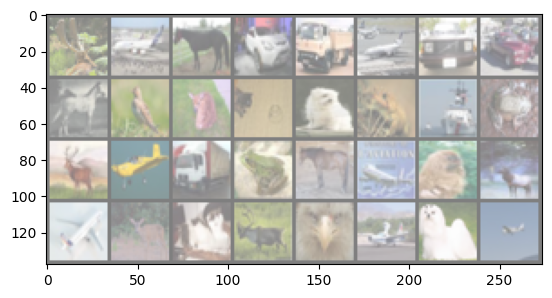

In [ ]:
from datasets import GetDataLoaders
import torchvision
import matplotlib.pyplot as plt
import numpy as np

train_dataloader, _ = GetDataLoaders(mnist=False, modelName="lenet", batch_size=32, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
     img = img / 2 + 0.5
     npimg = img.numpy()
     plt.imshow(np.transpose(npimg, (1, 2, 0)))
     plt.show()

images, labels = next(iter(train_dataloader))

imshow(torchvision.utils.make_grid(images))

In [ ]:
!mkdir models

In [ ]:
%%writefile models/resnet.py
import torch
import torch.nn as nn
import torch.nn.functional as F
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResNetBlock, self).__init__()
        self.conv1 = self.conv(in_channels,
                          out_channels,
                          kernel_size=3,
                          stride=stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = self.conv(out_channels,
                          out_channels,
                          kernel_size=3,
                          stride=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                self.conv(in_channels,
                     out_channels,
                     kernel_size=3, stride=stride),
                nn.BatchNorm2d(out_channels),
            )
    def conv(self, in_channels, out_channels, kernel_size, stride):
        return nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding=1, bias=False)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet18(nn.Module):
    def __init__(self, in_channels):
        num_classes = 10
        super(ResNet18, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(in_channels=in_channels,
                               out_channels=64,
                               kernel_size=3,
                               stride=1,
                               padding=1,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self.make_block(out_channels=64, stride=1)
        self.layer2 = self.make_block(out_channels=128, stride=2)
        self.layer3 = self.make_block(out_channels=256, stride=2)
        self.layer4 = self.make_block(out_channels=512, stride=2)
        self.linear = nn.Linear(512, num_classes)

    def make_block(self, out_channels, stride):
        layers = []
        for stride in [stride, 1]:
            layers.append(ResNetBlock(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = F.avg_pool2d(x, 4)
        x = torch.flatten(x, 1)
        x = self.linear(x)
        return x

Writing models/resnet.py


In [ ]:
%%writefile models/vgg.py
import torch
import torch.nn as nn
import torch.nn.functional as F
class VGG16(torch.nn.Module):
    def __init__(self, in_channels, num_classes):
        super(VGG16, self).__init__()
        self.blk1 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=in_channels,
                                out_channels=64,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=64,
                                out_channels=64,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )

        self.blk2 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=64,
                                out_channels=128,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=128,
                                out_channels=128,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )

        self.blk3 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=128,
                                out_channels=256,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=256,
                                out_channels=256,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=256,
                                out_channels=256,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )


        self.blk4 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=256,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )

        self.blk5 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )

        self.fc = torch.nn.Sequential(
            torch.nn.Linear(512*3*3, 4096),
            torch.nn.ReLU(True),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(True),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(4096, num_classes),
        )

        self.pool = torch.nn.AdaptiveAvgPool2d((3, 3))


    def forward(self, x):

        x = self.blk1(x)
        x = self.blk2(x)
        x = self.blk3(x)
        x = self.blk4(x)
        x = self.blk5(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

class VGG16Mnist(nn.Module):
  def __init__(self, in_channels=1, num_classes=10):
    super(VGG16Mnist, self).__init__()
    self.in_channels = in_channels
    self.convs = self.stack_layers([64, 64, 'pool', 128, 128, 'pool', 256, 256, 256, 'pool', 512, 512, 512, 'pool', 512, 512, 512, 'pool'])
    self.fully_connected = nn.Sequential(
        nn.Linear(512, 128),
        nn.ReLU(inplace = True),
        nn.Dropout(0.2),
        nn.Linear(128, 128),
        nn.ReLU(inplace = True),
        nn.Dropout(0.2),
        nn.Linear(128, num_classes)
    )

  def stack_layers(self, architecture):
    in_channels = self.in_channels
    stack = []

    for layer in architecture:
      if type(layer) == int:
        out = layer
        stack += [nn.Conv2d(in_channels, out, kernel_size = 3, stride = 1, padding = 1),
                  nn.BatchNorm2d(layer),
                  nn.ReLU(inplace = True)]
        in_channels = layer
      else:
        stack += [nn.MaxPool2d(kernel_size = 2)]

    return nn.Sequential(*stack)

  def forward(self, x):
    x = self.convs(x)
    x = x.reshape(x.shape[0], -1)
    x = self.fully_connected(x)

    return x


Writing models/vgg.py


In [ ]:
%%writefile models/lenet.py
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
  def __init__(self, in_channels,num_classes):
    super(LeNet, self).__init__()
    self.features = nn.Sequential(
            nn.Conv2d(in_channels, 6*in_channels, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6*in_channels, 16*in_channels, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )
    self.fc = nn.Sequential(
            nn.Linear(16*5*5*in_channels, 120*in_channels),
            nn.Tanh(),
            nn.Linear(120*in_channels, 84*in_channels),
            nn.Tanh(),
            nn.Linear(84*in_channels, num_classes),
        )

  def forward(self,x):
    x = self.features(x)
    x = torch.flatten(x, 1)
    x = self.fc(x)
    return x


Writing models/lenet.py


In [ ]:
%%writefile train.py
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch
import torchvision
from models import lenet, vgg, resnet
from datasets import GetDataLoaders
import torch.nn as nn
from tqdm.notebook import tqdm
import argparse
from pathlib import Path

parser = argparse.ArgumentParser()
parser.add_argument('--model', default='lenet',
                    help="options: lenet, resnet, vgg")
parser.add_argument('--dataset', default='mnist',
                    help="options: mnist, cifar")
parser.add_argument('--batch', default=32,
                    help="batch size")
parser.add_argument('--lr', default=0.01,
                    help="the learning rate")
parser.add_argument('--epochs', default=26,
                    help="epochs to train")
parser.add_argument('--optim', default="sgd",
                    help="optimizer")
parser.add_argument('--scenario', default="0",
                    help="scenario 1 is rotation and 2 is flip")

def SaveModel(model, path):
  torch.save(model.state_dict(), path)

def LoadModel(model, path):
  model.load_state_dict(torch.load(path))
  return model

def compute_accuracy(model, val_loader, device, criterion):
    total_correct = 0
    total_loss = 0
    model = model.to(device)
    for inputs, labels in tqdm(val_loader, leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        outputs = outputs.argmax(1)
        correct = (outputs == labels)
        total_correct += correct.sum()
    return total_correct / len(val_loader.dataset), total_loss

def train(model, train_loader, test_dataloader, num_epochs, criterion, optimizer, device):
    model = model.to(device)
    train_loss = []
    train_acc = []
    test_acc = []
    test_loss = []
    for epoch in tqdm(range(num_epochs)):
        total_loss = 0
        for inputs, labels in tqdm(train_loader, leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        curr_acc, _ = compute_accuracy(model, train_loader, device, criterion)
        if epoch % 5 == 0:
          train_loss.append(total_loss)
          train_acc.append(curr_acc.item())
          val_acc, val_loss = compute_accuracy(model, test_dataloader, device, criterion)
          test_acc.append(val_acc.item())
          test_loss.append(val_loss)

    return train_loss, train_acc, test_loss, test_acc

def PlotCode(train_loss, train_acc, test_loss, test_acc, epochs):
  X = np.arange(0, epochs, 5)
  # 1 row, 2 columns
  figure, axis = plt.subplots(1, 2)
  train_loss = np.array(train_loss)
  train_acc = np.array(train_acc)
  test_loss = np.array(test_loss)
  test_acc = np.array(test_acc)
  print("Training accuracy")
  print(train_acc)
  print("Test accuracy")
  print(test_acc)
  axis[0].plot(X, train_loss, label="train loss")
  axis[0].plot(X, test_loss, label="test loss")
  axis[0].set_title("Loss")
  axis[0].legend()
  axis[1].legend()
  axis[1].plot(X, train_acc, label="train acc")
  axis[1].plot(X, test_acc, label="test acc")
  axis[1].set_title("Accuracy")
  plt.legend(loc='best')
  plt.show()


if __name__ == '__main__':
    args = parser.parse_args()
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    criterion = nn.CrossEntropyLoss()
    epochs = args.epochs
    lr = float(args.lr)
    isMnist = False
    if args.dataset == "mnist":
      isMnist = True
    batch_size = args.batch
    scenario = args.scenario

    if args.model == "lenet":
      if isMnist is True:
        model = lenet.LeNet(1,10)
      else:
        model = lenet.LeNet(3,10)
    if args.model == "resnet":
      if isMnist is True:
        model = resnet.ResNet18(1)
      else:
        model = resnet.ResNet18(3)
    if args.model == "vgg":
      if isMnist is True:
        model = vgg.VGG16Mnist(1,10)
      else:
        model = vgg.VGG16(3,10)

    if args.optim == "sgd":
      optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9)
    if args.optim == "adam":
      optimizer = torch.optim.Adam(model.parameters(), lr)

    train_dataloader, test_dataloader = GetDataLoaders(mnist=isMnist, modelName=args.model, batch_size=batch_size, num_workers=2, scenario=scenario)
    train_loss, train_acc, test_loss, test_acc = train(model, train_dataloader, test_dataloader, epochs, criterion, optimizer, device)
    PlotCode(train_loss, train_acc, test_loss, test_acc, epochs)

Writing train.py


In [ ]:
%%writefile train.sh

python train.py --model lenet --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim sgd
python train.py --model lenet --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim adam
python train.py --model lenet --dataset mnist --batch 32 --lr 0.1 --epochs 50 --optim sgd
python train.py --model lenet --dataset mnist --batch 128 --lr 0.01 --epochs 50 --optim sgd
python train.py --model lenet --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 1
python train.py --model lenet --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 2

python train.py --model lenet --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim sgd
python train.py --model lenet --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim adam
python train.py --model lenet --dataset cifar --batch 32 --lr 0.1 --epochs 50 --optim sgd
python train.py --model lenet --dataset cifar --batch 128 --lr 0.01 --epochs 50 --optim sgd
python train.py --model lenet --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 1
python train.py --model lenet --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 2

python train.py --model resnet --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim sgd
python train.py --model resnet --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim adam
python train.py --model resnet --dataset mnist --batch 32 --lr 0.1 --epochs 50 --optim sgd
python train.py --model resnet --dataset mnist --batch 128 --lr 0.01 --epochs 50 --optim sgd
python train.py --model resnet --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 1
python train.py --model resnet --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 2

python train.py --model resnet --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim sgd
python train.py --model resnet --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim adam
python train.py --model resnet --dataset cifar --batch 32 --lr 0.1 --epochs 50 --optim sgd
python train.py --model resnet --dataset cifar --batch 128 --lr 0.01 --epochs 50 --optim sgd
python train.py --model resnet --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 1
python train.py --model resnet --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 2

python train.py --model vgg --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim sgd
python train.py --model vgg --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim adam
python train.py --model vgg --dataset mnist --batch 32 --lr 0.1 --epochs 50 --optim sgd
python train.py --model vgg --dataset mnist --batch 128 --lr 0.01 --epochs 50 --optim sgd
python train.py --model vgg --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 1
python train.py --model vgg --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 2

python train.py --model vgg --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim sgd
python train.py --model vgg --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim adam
python train.py --model vgg --dataset cifar --batch 32 --lr 0.1 --epochs 50 --optim sgd
python train.py --model vgg --dataset cifar --batch 128 --lr 0.01 --epochs 50 --optim sgd
python train.py --model vgg --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 1
python train.py --model vgg --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 2

Writing train.sh


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def PGD(x,y,model, device, niter=5, epsilon=0.3, stepsize=1e4, randinit=True):

  images = x.to(device)
  labels = y.to(device)
  loss = nn.CrossEntropyLoss()
  if randinit:
    images = images + torch.rand_like(images)
    images = torch.clamp(images, min=0, max=1).detach()


  ori_images = images.data
  for i in range(niter) :
    images.requires_grad = True
    outputs = model(images)

    model.zero_grad()
    cost = loss(outputs, labels).to(device)
    cost.backward()
    adv_images = images + stepsize*images.grad.sign()
    eta = torch.clamp(adv_images - ori_images, min=-epsilon, max=epsilon)
    images = torch.clamp(ori_images + eta, min=0, max=1).detach_()

  return images


def imshow(img):
     img = img / 2 + 0.5
     npimg = img.numpy()
     plt.imshow(np.transpose(npimg, (1, 2, 0)))
     plt.show()




def CalculateAccuracyAdversarial(test_dataloader, model, device, niter=5, epsilon=0.3, stepsize=2/255, randinit=True, doPrint=True):
  total = 0
  total_acc = 0
  total_acc_pgd = 0
  for images, labels in tqdm(test_dataloader, leave=False):
    images, labels = images.to(device), labels.to(device)
    delta = PGD(images,labels,model, device, niter, epsilon, stepsize, randinit)
    yp = model(images)
    actual = torch.argmax(yp, dim=1)
    yp_pgd = model(delta)
    modified = torch.argmax(yp_pgd,dim=1)
    total += len(actual)
    total_acc += (labels == actual).sum().item()
    total_acc_pgd += (labels == modified).sum().item()

  if doPrint:
    print(f"Total images: {total}")
    print(f"Actual percentage: {100*total_acc/total}")
    print(f"After attack percentage: {100*total_acc_pgd/total}")
  return total, 100*total_acc/total, 100*total_acc_pgd/total

'''
Subtask II-1: Analyze the Impact of Attack Hyper-parameters
We will focus on two attack hyper-parameters: niter and epsilon. Use the 2 DNNs in Task I (LeNet on MNIST and ResNet18 on CIFAR10).

(1) Set the number of iterations in {1, 2, 3, 4, 5, 10, 20, 30, 40, 80, 100}.
(2) Fix the iterations to 5, and set the epsilon to {0.01 0.02 0.03 0.04 0.05 0.1 0.2 0.3 0.4 0.5 1.0}.
'''

def PlotGraphs(x_row, adversarial_accuracies, title):
  # 1 row, 1 columns
  fig, axis = plt.subplots()
  axis.plot(x_row, adversarial_accuracies, label="advesarial accuracies")
  axis.set_title(title)
  axis.legend()
  plt.legend(loc='best')
  plt.show()

def HyperParameterImpact(test_dataloader, model, device, epsilon=0.3, stepsize=2/255, randinit=True, fixIter=True):
  clean_accuracies = []
  adversarial_accuracies = []
  if fixIter:
    numberOfIters = np.array([1,2,3,4,5,10,20,30,40,80,100])

    for i in numberOfIters:
      print(f"Number of iteration: {i}")
      _, clean_acc, adv_acc = CalculateAccuracyAdversarial(test_dataloader, model, device, i, epsilon, stepsize, randinit)
      clean_accuracies.append(clean_acc)
      adversarial_accuracies.append(adv_acc)
    clean_accuracies = np.array(clean_accuracies)
    adversarial_accuracies = np.array(adversarial_accuracies)
    PlotGraphs(numberOfIters, adversarial_accuracies, "no of iters vs accuracy")
  else:
    epsilons = np.array([0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,1.0])
    for e in epsilons:
      print(f"Epsilon: {e}")
      _, clean_acc, adv_acc = CalculateAccuracyAdversarial(test_dataloader, model, device, 5, e, stepsize, randinit)
      clean_accuracies.append(clean_acc)
      adversarial_accuracies.append(adv_acc)
    clean_accuracies = np.array(clean_accuracies)
    adversarial_accuracies = np.array(adversarial_accuracies)
    PlotGraphs(epsilons, adversarial_accuracies, "Epsilon vs accuracy")

MNIST section

100%|██████████| 9912422/9912422 [00:00<00:00, 230658377.59it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 36073762.31it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 188397706.19it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5284474.00it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Training accuracy
[0.9720667  0.9964667  0.99926668 0.99993336 0.99994999 1.        ]
Test accuracy
[0.97529995 0.9892     0.98979998 0.98929995 0.98979998 0.9896    ]


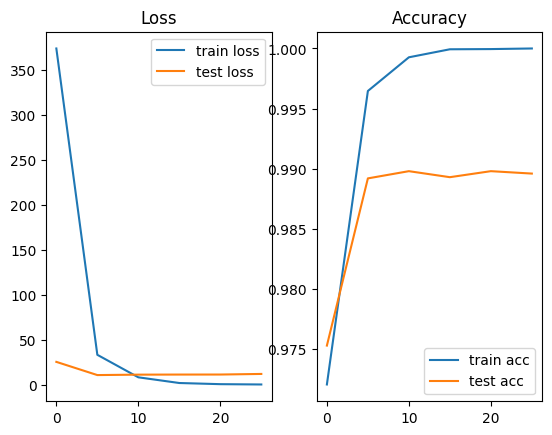

[373.5763390180655, 33.543722015980165, 8.559398123816209, 2.2339007905984545, 0.952753365059607, 0.608131724197392]
[25.70393638079986, 11.04232059224887, 11.521576582474609, 11.61770402115826, 11.646635754181943, 12.307022842716691]
[0.9720667004585266, 0.9964666962623596, 0.9992666840553284, 0.9999333620071411, 0.9999499917030334, 1.0]
[0.9752999544143677, 0.9891999959945679, 0.989799976348877, 0.9892999529838562, 0.989799976348877, 0.9896000027656555]


In [ ]:
import torch
import torchvision
from models import lenet, vgg, resnet
from datasets import GetDataLoaders
from train import train, compute_accuracy, PlotCode
import torch.nn as nn
from tqdm.notebook import tqdm
import argparse
from pathlib import Path


device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
train_dataloader, test_dataloader = GetDataLoaders()
model = lenet.LeNet(1,10)
optimizer = torch.optim.SGD(model.parameters(), 0.1)
epochs = 26
train_loss, train_acc, test_loss, test_acc = train(model, train_dataloader, test_dataloader, epochs, criterion, optimizer, device)
PlotCode(train_loss, train_acc, test_loss, test_acc, epochs)

print(train_loss)
print(test_loss)
print(train_acc)
print(test_acc)

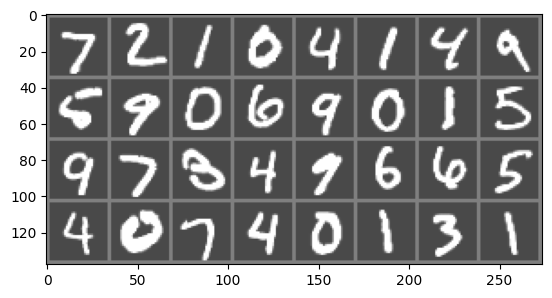

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')


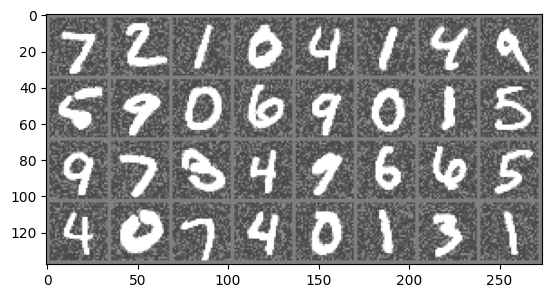

tensor([0, 0, 6, 0, 0, 0, 8, 0, 6, 8, 0, 6, 0, 0, 0, 8, 8, 0, 8, 8, 0, 6, 6, 6,
        0, 0, 0, 0, 0, 6, 0, 0], device='cuda:0')
Actual percentage: 96.875
After attack percentage: 25.0
tensor(25., device='cuda:0')


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 23.93


(10000, 98.96, 23.93)

In [ ]:

images, labels = next(iter(test_dataloader))

imshow(torchvision.utils.make_grid(images))
images, labels = images.to(device), labels.to(device)
delta = PGD(images,labels,model, device, niter=5, epsilon=0.3, stepsize=2/255, randinit=True)
yp = model(images)
actual = torch.argmax(yp, dim=1)
print(actual)

imshow(torchvision.utils.make_grid(images.cpu() + delta.cpu()))
yp_pgd = model(delta)
modified = torch.argmax(yp_pgd,dim=1)

print(modified)


print(f"Actual percentage: {100*(labels == actual).sum()/len(actual)}")
print(f"After attack percentage: {100*(labels == modified).sum()/len(actual)}")

print(100*(labels == modified).sum()/len(actual))

CalculateAccuracyAdversarial(test_dataloader, model, device, 5, 0.3, 2/255, True)


Calculate accuracy on adversarial samples MNIST

Number of iteration: 1


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 50.59
Number of iteration: 2


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 41.83
Number of iteration: 3


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 34.59
Number of iteration: 4


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 28.31
Number of iteration: 5


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 23.44
Number of iteration: 10


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 10.55
Number of iteration: 20


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 0.69
Number of iteration: 30


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 0.01
Number of iteration: 40


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 0.0
Number of iteration: 80


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 0.0
Number of iteration: 100


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 0.0


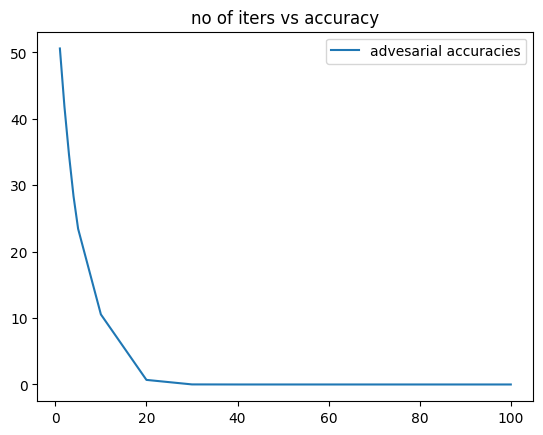

In [ ]:
HyperParameterImpact(test_dataloader, model, device, epsilon=0.3, stepsize=2/255, randinit=True, fixIter=True)

Epsilon: 0.01


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 47.78
Epsilon: 0.02


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 37.03
Epsilon: 0.03


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 29.07
Epsilon: 0.04


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 23.84
Epsilon: 0.05


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 23.83
Epsilon: 0.1


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 23.84
Epsilon: 0.2


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 23.73
Epsilon: 0.3


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 23.85
Epsilon: 0.4


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 23.74
Epsilon: 0.5


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 23.6
Epsilon: 1.0


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.96
After attack percentage: 23.91


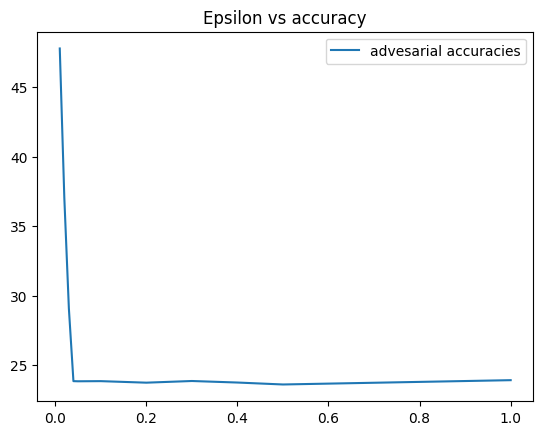

In [ ]:
HyperParameterImpact(test_dataloader, model, device, epsilon=0.3, stepsize=2/255, randinit=True, fixIter=False)

LeNet with rotation

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Training accuracy
[0.96756667 0.98623335 0.99115002 0.99303335 0.99379998 0.99481666]
Test accuracy
[0.97899997 0.98799998 0.99039996 0.99169999 0.99179995 0.99219996]


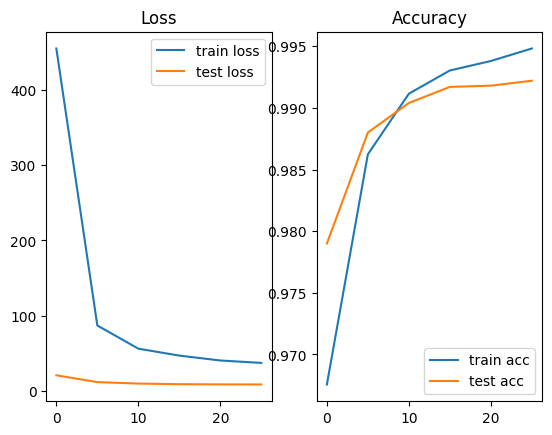

[454.8680002358742, 86.90102222852875, 56.109647660006885, 46.9007180549379, 40.405388808118005, 37.19364421538921]
[20.756265952135436, 11.683134843493463, 9.747176837441657, 8.912006853286584, 8.66558881817582, 8.542709913331237]
[0.9675666689872742, 0.9862333536148071, 0.9911500215530396, 0.9930333495140076, 0.9937999844551086, 0.9948166608810425]
[0.9789999723434448, 0.9879999756813049, 0.990399956703186, 0.9916999936103821, 0.9917999505996704, 0.9921999573707581]


In [ ]:
import torch
import torchvision
from models import lenet, vgg, resnet
from datasets import GetDataLoaders
from train import train, compute_accuracy, PlotCode
import torch.nn as nn
from tqdm.notebook import tqdm
import argparse
from pathlib import Path


device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
train_dataloader, test_dataloader = GetDataLoaders(mnist=True, modelName="lenet", batch_size=32, num_workers=2, scenario=1)
model = lenet.LeNet(1,10)
optimizer = torch.optim.SGD(model.parameters(), 0.1)
epochs = 26
train_loss, train_acc, test_loss, test_acc = train(model, train_dataloader, test_dataloader, epochs, criterion, optimizer, device)
PlotCode(train_loss, train_acc, test_loss, test_acc, epochs)

print(train_loss)
print(test_loss)
print(train_acc)
print(test_acc)

Number of iteration: 1


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 37.12
Number of iteration: 2


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 31.37
Number of iteration: 3


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 26.5
Number of iteration: 4


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 22.8
Number of iteration: 5


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 19.58
Number of iteration: 10


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 9.82
Number of iteration: 20


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 1.57
Number of iteration: 30


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 0.09
Number of iteration: 40


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 0.0
Number of iteration: 80


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 0.0
Number of iteration: 100


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 0.0


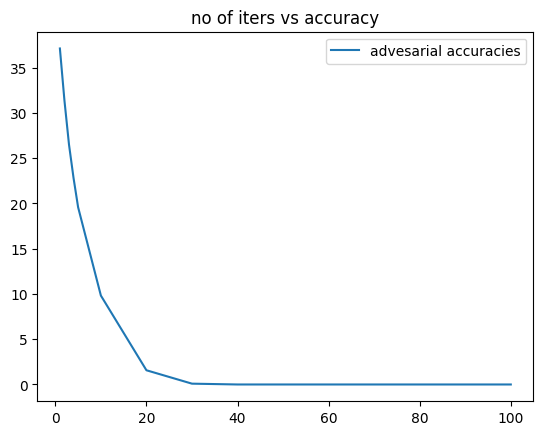

In [ ]:
HyperParameterImpact(test_dataloader, model, device, epsilon=0.3, stepsize=2/255, randinit=True, fixIter=True)

Epsilon: 0.01


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 35.14
Epsilon: 0.02


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 28.05
Epsilon: 0.03


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 22.98
Epsilon: 0.04


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 19.76
Epsilon: 0.05


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 19.56
Epsilon: 0.1


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 19.53
Epsilon: 0.2


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 19.97
Epsilon: 0.3


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 19.65
Epsilon: 0.4


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 19.86
Epsilon: 0.5


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 19.45
Epsilon: 1.0


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 99.22
After attack percentage: 19.46


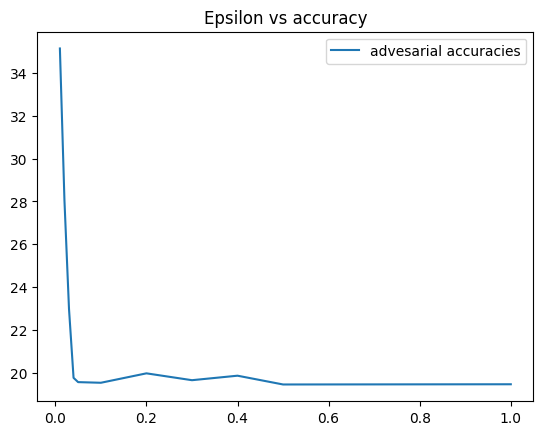

In [ ]:
HyperParameterImpact(test_dataloader, model, device, epsilon=0.3, stepsize=2/255, randinit=True, fixIter=False)

LeNet with flip


  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Training accuracy
[0.95711666 0.98680001 0.99260002 0.99633336 0.99520004 0.99863333]
Test accuracy
[0.958      0.97789997 0.98109996 0.98279995 0.98289996 0.98389995]


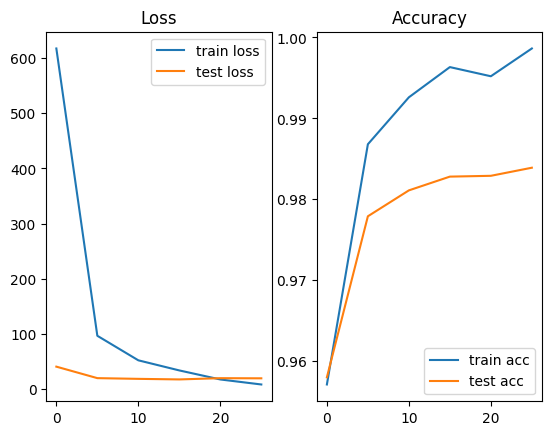

[617.4894214691594, 96.75625007855706, 52.28755344936508, 33.95636588424168, 17.582244355304283, 8.499405963411846]
[40.81515799788758, 19.98385045901523, 18.69382655217123, 17.655585197066102, 19.921483701797115, 19.65818954064116]
[0.9571166634559631, 0.9868000149726868, 0.9926000237464905, 0.9963333606719971, 0.9952000379562378, 0.9986333250999451]
[0.9580000042915344, 0.977899968624115, 0.9810999631881714, 0.9827999472618103, 0.9828999638557434, 0.9838999509811401]


In [ ]:
import torch
import torchvision
from models import lenet, vgg, resnet
from datasets import GetDataLoaders
from train import train, compute_accuracy, PlotCode
import torch.nn as nn
from tqdm.notebook import tqdm
import argparse
from pathlib import Path


device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
train_dataloader, test_dataloader = GetDataLoaders(mnist=True, modelName="lenet", batch_size=32, num_workers=2, scenario=2)
model = lenet.LeNet(1,10)
optimizer = torch.optim.SGD(model.parameters(), 0.1)
epochs = 26
train_loss, train_acc, test_loss, test_acc = train(model, train_dataloader, test_dataloader, epochs, criterion, optimizer, device)
PlotCode(train_loss, train_acc, test_loss, test_acc, epochs)

print(train_loss)
print(test_loss)
print(train_acc)
print(test_acc)

Number of iteration: 1


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 24.61
Number of iteration: 2


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 19.5
Number of iteration: 3


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 15.27
Number of iteration: 4


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 12.67
Number of iteration: 5


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 11.18
Number of iteration: 10


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 6.86
Number of iteration: 20


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 1.2
Number of iteration: 30


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 0.04
Number of iteration: 40


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 0.0
Number of iteration: 80


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 0.0
Number of iteration: 100


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 0.0


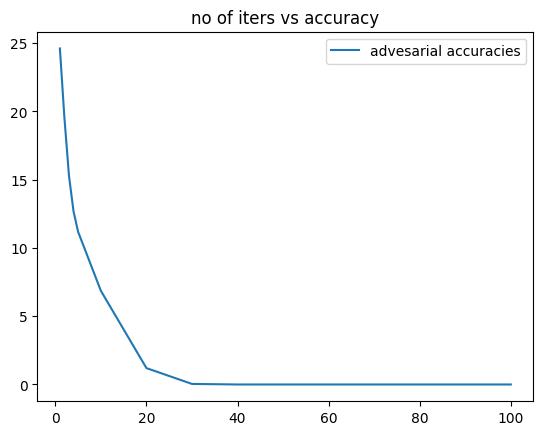

In [ ]:
HyperParameterImpact(test_dataloader, model, device, epsilon=0.3, stepsize=2/255, randinit=True, fixIter=True)

Epsilon: 0.01


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 23.0
Epsilon: 0.02


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 16.68
Epsilon: 0.03


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 12.77
Epsilon: 0.04


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 10.99
Epsilon: 0.05


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 10.96
Epsilon: 0.1


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 10.91
Epsilon: 0.2


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 11.23
Epsilon: 0.3


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 11.15
Epsilon: 0.4


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 11.11
Epsilon: 0.5


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 11.03
Epsilon: 1.0


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.39
After attack percentage: 10.98


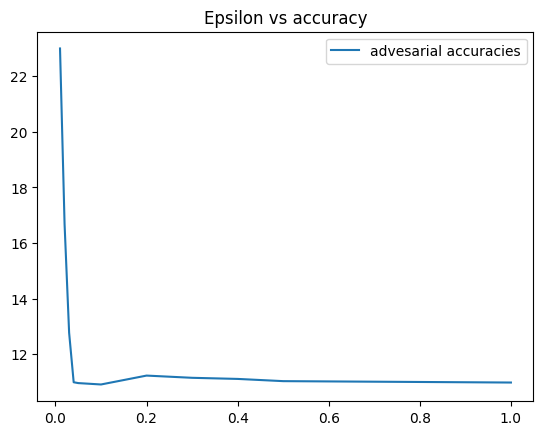

In [ ]:
HyperParameterImpact(test_dataloader, model, device, epsilon=0.3, stepsize=2/255, randinit=True, fixIter=False)

CIFAR 10 section

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Training accuracy
[0.52462    0.89436001 0.97757995 0.98809999 0.99719995 0.99751997]
Test accuracy
[0.52239996 0.79079998 0.82559997 0.82799995 0.84309995 0.84169996]


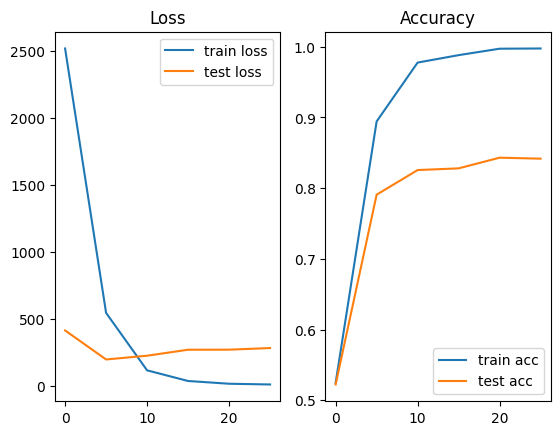

[2520.999261200428, 546.0567027237266, 116.80373313755263, 37.19155381942255, 16.67685454205821, 11.156014857828268]
[414.79182040691376, 197.94122694432735, 225.98245102912188, 270.7962428852916, 271.1082475828007, 283.3420856408775]
[0.524619996547699, 0.8943600058555603, 0.9775799512863159, 0.988099992275238, 0.9971999526023865, 0.9975199699401855]
[0.5223999619483948, 0.7907999753952026, 0.8255999684333801, 0.8279999494552612, 0.8430999517440796, 0.8416999578475952]


In [ ]:
import torch
import torchvision
from models import lenet, vgg, resnet
from datasets import GetDataLoaders
from train import train, compute_accuracy, PlotCode
import torch.nn as nn
from tqdm.notebook import tqdm
import argparse
from pathlib import Path


device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
train_dataloader, test_dataloader = GetDataLoaders(mnist=False, modelName="resnet")
model = resnet.ResNet18(3)
optimizer = torch.optim.SGD(model.parameters(), 0.1)
epochs = 26
train_loss, train_acc, test_loss, test_acc = train(model, train_dataloader, test_dataloader, epochs, criterion, optimizer, device)
PlotCode(train_loss, train_acc, test_loss, test_acc, epochs)

print(train_loss)
print(test_loss)
print(train_acc)
print(test_acc)


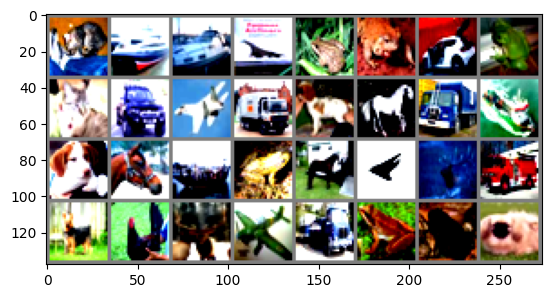

tensor([3, 8, 8, 0, 6, 6, 1, 3, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 2, 4, 9,
        4, 2, 4, 0, 9, 6, 6, 5], device='cuda:0')


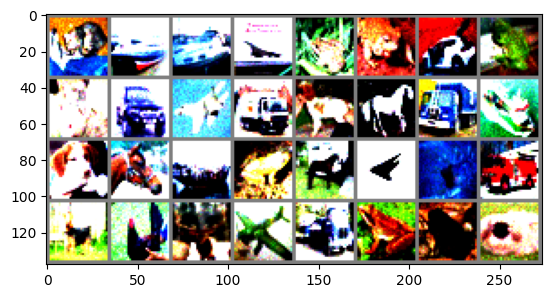

tensor([5, 8, 0, 8, 6, 6, 0, 4, 7, 9, 4, 1, 5, 7, 9, 6, 5, 9, 0, 6, 3, 2, 2, 9,
        4, 6, 5, 0, 1, 4, 3, 6], device='cuda:0')
Actual percentage: 90.625
After attack percentage: 31.25
tensor(31.2500, device='cuda:0')


In [ ]:
images, labels = next(iter(test_dataloader))

imshow(torchvision.utils.make_grid(images))
images, labels = images.to(device), labels.to(device)
delta = PGD(images,labels,model, device, niter=5, epsilon=0.03, stepsize=2/255, randinit=True)
yp = model(images)
actual = torch.argmax(yp, dim=1)
print(actual)

imshow(torchvision.utils.make_grid(images.cpu() + delta.cpu()))
yp_pgd = model(delta)
modified = torch.argmax(yp_pgd,dim=1)

print(modified)


print(f"Actual percentage: {100*(labels == actual).sum()/len(actual)}")
print(f"After attack percentage: {100*(labels == modified).sum()/len(actual)}")

print(100*(labels == modified).sum()/len(actual))

Calculate accuracy on adversarial samples CIFAR

In [ ]:
CalculateAccuracyAdversarial(test_dataloader, model, device, 5, 0.03, 2/255, True)


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 27.08


(10000, 84.17, 27.08)

Number of iteration: 1


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 49.62
Number of iteration: 2


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 43.12
Number of iteration: 3


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 37.15
Number of iteration: 4


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 31.34
Number of iteration: 5


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 27.32
Number of iteration: 10


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 20.02
Number of iteration: 20


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 18.46
Number of iteration: 30


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 18.41
Number of iteration: 40


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 18.19
Number of iteration: 80


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 18.14
Number of iteration: 100


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 18.33


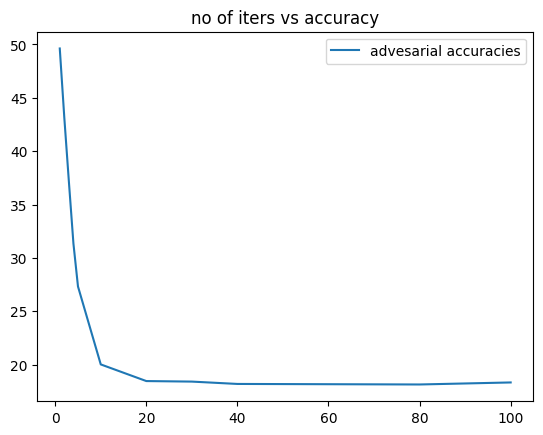

In [ ]:

HyperParameterImpact(test_dataloader, model, device, epsilon=0.03, stepsize=2/255, randinit=True, fixIter=True)

Epsilon: 0.01


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 41.51
Epsilon: 0.02


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 32.94
Epsilon: 0.03


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 27.33
Epsilon: 0.04


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 23.95
Epsilon: 0.05


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 23.61
Epsilon: 0.1


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 24.35
Epsilon: 0.2


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 24.13
Epsilon: 0.3


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 24.06
Epsilon: 0.4


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 23.76
Epsilon: 0.5


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 24.35
Epsilon: 1.0


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 84.17
After attack percentage: 24.07


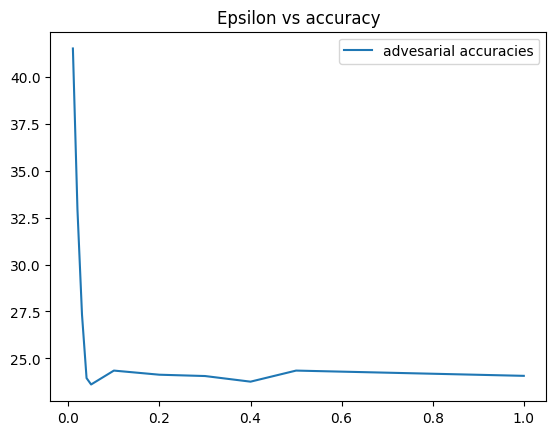

In [ ]:
HyperParameterImpact(test_dataloader, model, device, epsilon=0.03, stepsize=2/255, randinit=True, fixIter=False)

Resnet18 with flip


Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Training accuracy
[0.51437998 0.83752    0.90631998 0.95537996 0.97178    0.98019999]
Test accuracy
[0.51539999 0.80869997 0.83949995 0.861      0.87059999 0.86989999]


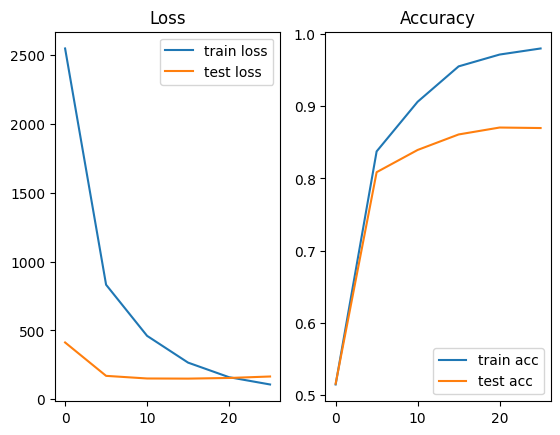

[2547.7737839818, 832.0599211901426, 460.89168231375515, 266.4215414542705, 160.49943163531134, 107.68871334916912]
[412.826275408268, 170.3227045238018, 151.22222547978163, 150.23230420053005, 154.95539554953575, 165.63091379404068]
[0.5143799781799316, 0.8375200033187866, 0.9063199758529663, 0.9553799629211426, 0.971780002117157, 0.9801999926567078]
[0.5153999924659729, 0.8086999654769897, 0.8394999504089355, 0.8610000014305115, 0.8705999851226807, 0.8698999881744385]


In [ ]:
import torch
import torchvision
from models import lenet, vgg, resnet
from datasets import GetDataLoaders
from train import train, compute_accuracy, PlotCode
import torch.nn as nn
from tqdm.notebook import tqdm
import argparse
from pathlib import Path


device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
train_dataloader, test_dataloader = GetDataLoaders(mnist=False, modelName="resnet", scenario=1)
model = resnet.ResNet18(3)
optimizer = torch.optim.SGD(model.parameters(), 0.1)
epochs = 26
train_loss, train_acc, test_loss, test_acc = train(model, train_dataloader, test_dataloader, epochs, criterion, optimizer, device)
PlotCode(train_loss, train_acc, test_loss, test_acc, epochs)

print(train_loss)
print(test_loss)
print(train_acc)
print(test_acc)

Number of iteration: 1


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 47.3
Number of iteration: 2


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 40.13
Number of iteration: 3


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 35.02
Number of iteration: 4


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 29.8
Number of iteration: 5


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 26.83
Number of iteration: 10


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 20.72
Number of iteration: 20


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 18.1
Number of iteration: 30


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 17.52
Number of iteration: 40


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 17.43
Number of iteration: 80


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 17.04
Number of iteration: 100


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 17.2


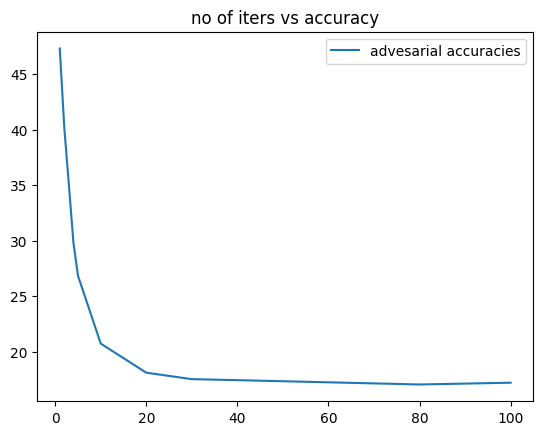

In [ ]:
HyperParameterImpact(test_dataloader, model, device, epsilon=0.03, stepsize=2/255, randinit=True, fixIter=True)

Epsilon: 0.01


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 38.12
Epsilon: 0.02


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 31.35
Epsilon: 0.03


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 27.03
Epsilon: 0.04


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 24.65
Epsilon: 0.05


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 24.6
Epsilon: 0.1


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 23.93
Epsilon: 0.2


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 24.61
Epsilon: 0.3


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 24.0
Epsilon: 0.4


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 24.69
Epsilon: 0.5


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 23.98
Epsilon: 1.0


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 86.99
After attack percentage: 24.11


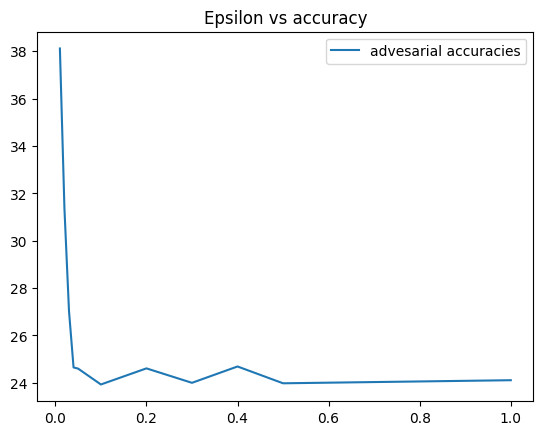

In [ ]:
HyperParameterImpact(test_dataloader, model, device, epsilon=0.03, stepsize=2/255, randinit=True, fixIter=False)

Resnet18 with rotation

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Training accuracy
[0.57713997 0.90227997 0.95041996 0.98016    0.98399997 0.99131995]
Test accuracy
[0.56629997 0.83660001 0.85359997 0.86969995 0.86930001 0.87619996]


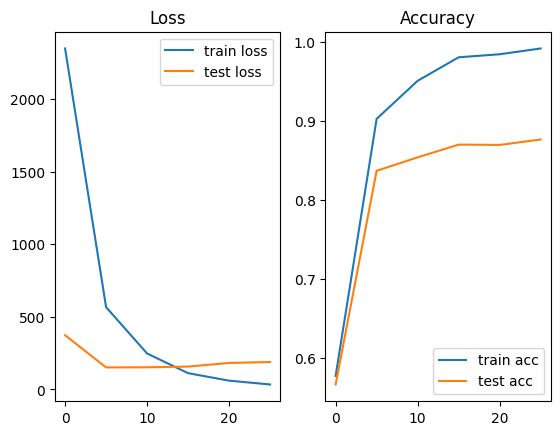

[2349.3790850639343, 566.4660371392965, 247.3378531667404, 111.55954092790489, 59.97750791956787, 33.5855890195744]
[373.18188214302063, 151.1417971253395, 152.04564213752747, 157.0010604634881, 181.99368757009506, 188.25176725070924]
[0.5771399736404419, 0.9022799730300903, 0.9504199624061584, 0.9801599979400635, 0.9839999675750732, 0.9913199543952942]
[0.5662999749183655, 0.8366000056266785, 0.8535999655723572, 0.8696999549865723, 0.8693000078201294, 0.8761999607086182]


In [ ]:
import torch
import torchvision
from models import lenet, vgg, resnet
from datasets import GetDataLoaders
from train import train, compute_accuracy, PlotCode
import torch.nn as nn
from tqdm.notebook import tqdm
import argparse
from pathlib import Path


device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
train_dataloader, test_dataloader = GetDataLoaders(mnist=False, modelName="resnet", scenario=2)
model = resnet.ResNet18(3)
optimizer = torch.optim.SGD(model.parameters(), 0.1)
epochs = 26
train_loss, train_acc, test_loss, test_acc = train(model, train_dataloader, test_dataloader, epochs, criterion, optimizer, device)
PlotCode(train_loss, train_acc, test_loss, test_acc, epochs)

print(train_loss)
print(test_loss)
print(train_acc)
print(test_acc)


Number of iteration: 1


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 50.01
Number of iteration: 2


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 42.26
Number of iteration: 3


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 35.65
Number of iteration: 4


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 29.02
Number of iteration: 5


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 24.72
Number of iteration: 10


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 17.26
Number of iteration: 20


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 15.4
Number of iteration: 30


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 15.27
Number of iteration: 40


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 15.0
Number of iteration: 80


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 14.35
Number of iteration: 100


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 14.19


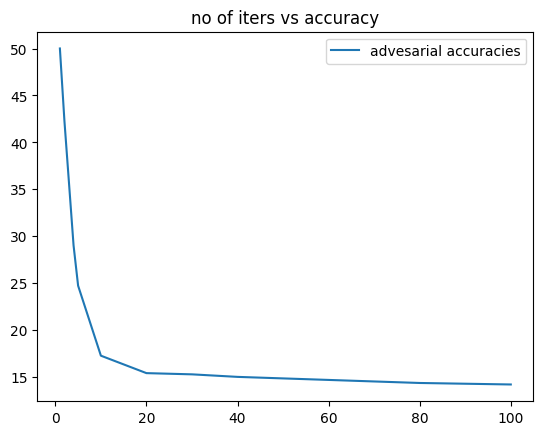

In [ ]:
HyperParameterImpact(test_dataloader, model, device, epsilon=0.03, stepsize=2/255, randinit=True, fixIter=True)

Epsilon: 0.01


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 40.55
Epsilon: 0.02


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 30.83
Epsilon: 0.03


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 24.02
Epsilon: 0.04


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 20.87
Epsilon: 0.05


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 21.93
Epsilon: 0.1


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 21.02
Epsilon: 0.2


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 20.59
Epsilon: 0.3


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 21.3
Epsilon: 0.4


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 20.84
Epsilon: 0.5


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 21.12
Epsilon: 1.0


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 87.62
After attack percentage: 20.95


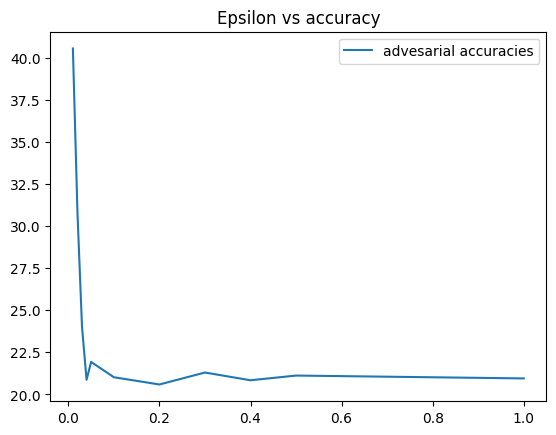

In [ ]:
HyperParameterImpact(test_dataloader, model, device, epsilon=0.03, stepsize=2/255, randinit=True, fixIter=False)

Adversarial training

In [ ]:
%%writefile adv_train.py

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch
import torchvision
from models import lenet, vgg, resnet
from datasets import GetDataLoaders
import torch.nn as nn
from tqdm.notebook import tqdm
import argparse
from pathlib import Path

parser = argparse.ArgumentParser()
parser.add_argument('--model', default='lenet',
                    help="options: lenet, resnet, vgg")
parser.add_argument('--dataset', default='mnist',
                    help="options: mnist, cifar")
parser.add_argument('--batch', default=32,
                    help="batch size")
parser.add_argument('--lr', default=0.01,
                    help="the learning rate")
parser.add_argument('--epochs', default=26,
                    help="epochs to train")
parser.add_argument('--optim', default="sgd",
                    help="optimizer")
parser.add_argument('--scenario', default="0",
                    help="scenario 1 is rotation and 2 is flip")

parser.add_argument('--epsilon', default=0.3,
                    help="epsilon value")
parser.add_argument('--niter', default=5,
                    help="number of iterations for pgd")
parser.add_argument('--stepsize', default=1e-4,
                    help="step size for attack")
parser.add_argument('--randinit', type=str2bool, nargs='?',
                        const=True, default=True,
                        help="random init")

def SaveModel(model, path):
  torch.save(model.state_dict(), path)

#reference: https://stackoverflow.com/questions/15008758/parsing-boolean-values-with-argparse
def str2bool(v):
  if isinstance(v, bool):
    return v
  if v.lower() in ('yes', 'true', 't', 'y', '1'):
    return True
  elif v.lower() in ('no', 'false', 'f', 'n', '0'):
    return False
  else:
    raise argparse.ArgumentTypeError('Boolean value expected.')

def LoadModel(model, path):
  model.load_state_dict(torch.load(path))
  return model

def compute_accuracy(model, val_loader, device, criterion):
    total_correct = 0
    total_loss = 0
    model = model.to(device)
    for inputs, labels in tqdm(val_loader, leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        outputs = outputs.argmax(1)
        correct = (outputs == labels)
        total_correct += correct.sum()
    return total_correct / len(val_loader.dataset), total_loss

import numpy as np
import matplotlib.pyplot as plt

def PGD(x,y,model, device, niter=5, epsilon=0.3, stepsize=1e-4, randinit=True):

  images = x.to(device)
  labels = y.to(device)
  loss = nn.CrossEntropyLoss()
  if randinit:
    images = images + torch.rand_like(images)
    images = torch.clamp(images, min=0, max=1).detach()


  ori_images = images.data
  for i in range(niter) :
    images.requires_grad = True
    outputs = model(images)

    model.zero_grad()
    cost = loss(outputs, labels).to(device)
    cost.backward()
    adv_images = images + stepsize*images.grad.sign()
    eta = torch.clamp(adv_images - ori_images, min=-epsilon, max=epsilon)
    images = torch.clamp(ori_images + eta, min=0, max=1).detach_()

  return images


def imshow(img):
     img = img / 2 + 0.5
     npimg = img.numpy()
     plt.imshow(np.transpose(npimg, (1, 2, 0)))
     plt.show()

def CalculateAccuracyAdversarial(test_dataloader, model, device, niter=5, epsilon=0.3, stepsize=2/255, randinit=True, doPrint=True):
  total = 0
  total_acc = 0
  total_acc_pgd = 0
  for images, labels in tqdm(test_dataloader, leave=False):
    images, labels = images.to(device), labels.to(device)
    delta = PGD(images,labels,model, device, niter, epsilon, stepsize, randinit)
    yp = model(images)
    actual = torch.argmax(yp, dim=1)
    yp_pgd = model(delta)
    modified = torch.argmax(yp_pgd,dim=1)
    total += len(actual)
    total_acc += (labels == actual).sum().item()
    total_acc_pgd += (labels == modified).sum().item()

  if doPrint:
    print(f"Total images: {total}")
    print(f"Actual percentage: {100*total_acc/total}")
    print(f"After attack percentage: {100*total_acc_pgd/total}")
  return total, 100*total_acc/total, 100*total_acc_pgd/total

def PlotGraphs(x_row, adversarial_accuracies, title):
  # 1 row, 1 columns
  fig, axis = plt.subplots()
  axis.plot(x_row, adversarial_accuracies, label="advesarial accuracies")
  axis.set_title(title)
  axis.legend()
  plt.legend(loc='best')
  plt.show()

def HyperParameterImpact(test_dataloader, model, device, epsilon=0.3, stepsize=2/255, randinit=True, fixIter=True):
  clean_accuracies = []
  adversarial_accuracies = []
  if fixIter:
    numberOfIters = np.array([1,2,3,4,5,10,20,30,40,80,100])

    for i in numberOfIters:
      print(f"Number of iteration: {i}")
      _, clean_acc, adv_acc = CalculateAccuracyAdversarial(test_dataloader, model, device, i, epsilon, stepsize, randinit)
      clean_accuracies.append(clean_acc)
      adversarial_accuracies.append(adv_acc)
    clean_accuracies = np.array(clean_accuracies)
    adversarial_accuracies = np.array(adversarial_accuracies)
    PlotGraphs(numberOfIters, adversarial_accuracies, "no of iters vs accuracy")
  else:
    epsilons = np.array([0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,1.0])
    for e in epsilons:
      print(f"Epsilon: {e}")
      _, clean_acc, adv_acc = CalculateAccuracyAdversarial(test_dataloader, model, device, 5, e, stepsize, randinit)
      clean_accuracies.append(clean_acc)
      adversarial_accuracies.append(adv_acc)
    clean_accuracies = np.array(clean_accuracies)
    adversarial_accuracies = np.array(adversarial_accuracies)
    PlotGraphs(epsilons, adversarial_accuracies, "Epsilon vs accuracy")

def adv_train(model, train_loader, test_dataloader, num_epochs, criterion, optimizer, device, niter=5, epsilon=0.3, stepsize=1e4, randinit=True):
    model = model.to(device)
    train_loss = []
    train_acc = []
    test_acc = []
    test_loss = []
    for epoch in tqdm(range(num_epochs)):
        total_loss = 0
        for inputs, labels in tqdm(train_loader, leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            delta = PGD(inputs,labels,model, device, niter, epsilon, stepsize, randinit)
            outputs = model(delta)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        curr_acc, _ = compute_accuracy(model, train_loader, device, criterion)
        if epoch % 5 == 0:
          train_loss.append(total_loss)
          train_acc.append(curr_acc.item())
          val_acc, val_loss = compute_accuracy(model, test_dataloader, device, criterion)
          test_acc.append(val_acc.item())
          test_loss.append(val_loss)

    return train_loss, train_acc, test_loss, test_acc

def PlotCode(train_loss, train_acc, test_loss, test_acc, epochs):
  X = np.arange(0, epochs, 5)
  # 1 row, 2 columns
  figure, axis = plt.subplots(1, 2)
  train_loss = np.array(train_loss)
  train_acc = np.array(train_acc)
  test_loss = np.array(test_loss)
  test_acc = np.array(test_acc)
  print("Training accuracy")
  print(train_acc)
  print("Test accuracy")
  print(test_acc)
  axis[0].plot(X, train_loss, label="train loss")
  axis[0].plot(X, test_loss, label="test loss")
  axis[0].set_title("Loss")
  axis[0].legend()
  axis[1].legend()
  axis[1].plot(X, train_acc, label="train acc")
  axis[1].plot(X, test_acc, label="test acc")
  axis[1].set_title("Accuracy")
  plt.legend(loc='best')
  plt.show()


if __name__ == '__main__':
    args = parser.parse_args()
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    criterion = nn.CrossEntropyLoss()
    epochs = args.epochs
    lr = float(args.lr)
    isMnist = False
    if args.dataset == "mnist":
      isMnist = True
    batch_size = args.batch
    scenario = args.scenario

    if args.model == "lenet":
      if isMnist is True:
        model = lenet.LeNet(1,10)
      else:
        model = lenet.LeNet(3,10)
    if args.model == "resnet":
      if isMnist is True:
        model = resnet.ResNet18(1)
      else:
        model = resnet.ResNet18(3)
    if args.model == "vgg":
      if isMnist is True:
        model = vgg.VGG16Mnist(1,10)
      else:
        model = vgg.VGG16(3,10)

    if args.optim == "sgd":
      optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9)
    if args.optim == "adam":
      optimizer = torch.optim.Adam(model.parameters(), lr)

    niter = args.niter
    epsilon= float(args.epsilon)
    stepsize=float(args.stepsize)
    randinit= str2bool(args.randinit)
    train_dataloader, test_dataloader = GetDataLoaders(mnist=isMnist, modelName=args.model, batch_size=batch_size, num_workers=2, scenario=scenario)
    train_loss, train_acc, test_loss, test_acc = adv_train(model, train_dataloader, test_dataloader, epochs, criterion, optimizer, device, niter, epsilon, stepsize, randinit)
    PlotCode(train_loss, train_acc, test_loss, test_acc, epochs)

Writing adv_train.py


Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Training accuracy
[0.44395998 0.79841995 0.91964    0.96787995 0.97687995 0.98695999]
Test accuracy
[0.43799999 0.71819997 0.7317     0.73699999 0.73949999 0.74329996]


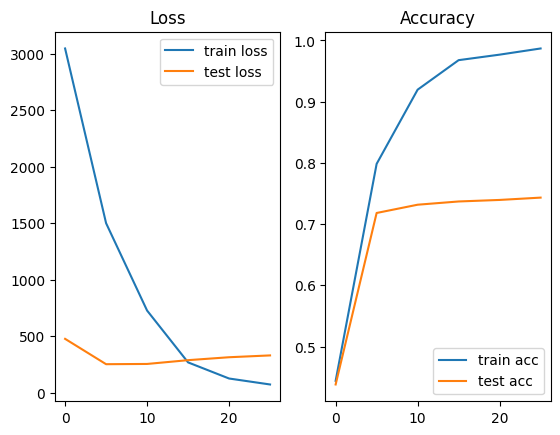

[3045.614158630371, 1500.6444412469864, 727.9700055122375, 269.4468832630664, 126.89460171991959, 74.12134024966508]
[477.68414092063904, 253.47697630524635, 255.64237704873085, 289.1561771929264, 315.0282605290413, 331.1361715346575]
[0.4439599812030792, 0.7984199523925781, 0.9196400046348572, 0.9678799510002136, 0.9768799543380737, 0.9869599938392639]
[0.43799999356269836, 0.7181999683380127, 0.7317000031471252, 0.7369999885559082, 0.7394999861717224, 0.7432999610900879]


In [ ]:
import torch
import torchvision
from models import lenet, vgg, resnet
from datasets import GetDataLoaders
from adv_train import adv_train, compute_accuracy, PlotCode
import torch.nn as nn
from tqdm.notebook import tqdm
import argparse
from pathlib import Path


device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
train_dataloader, test_dataloader = GetDataLoaders(mnist=False, modelName="resnet")
model = resnet.ResNet18(3)
optimizer = torch.optim.SGD(model.parameters(), 0.1)
epochs = 26
train_loss, train_acc, test_loss, test_acc = adv_train(model, train_dataloader, test_dataloader, epochs, criterion, optimizer, device,5, 0.03, 2/255, True)
PlotCode(train_loss, train_acc, test_loss, test_acc, epochs)

print(train_loss)
print(test_loss)
print(train_acc)
print(test_acc)

In [ ]:
CalculateAccuracyAdversarial(test_dataloader, model, device, 5, 0.03, 2/255, True)


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 74.33
After attack percentage: 61.31


(10000, 74.33, 61.31)

In [ ]:
CalculateAccuracyAdversarial(test_dataloader, model, device, 7, 0.03, 2/255, True)


  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 74.33
After attack percentage: 61.01


(10000, 74.33, 61.01)

100%|██████████| 9912422/9912422 [00:00<00:00, 353063607.64it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30909847.88it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 62886604.08it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5081496.07it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Training accuracy
[0.97944999 0.99129999 0.99419999 0.99489999 0.99681669 0.99573332]
Test accuracy
[0.9774     0.9853     0.98609996 0.98539996 0.98649997 0.98519999]


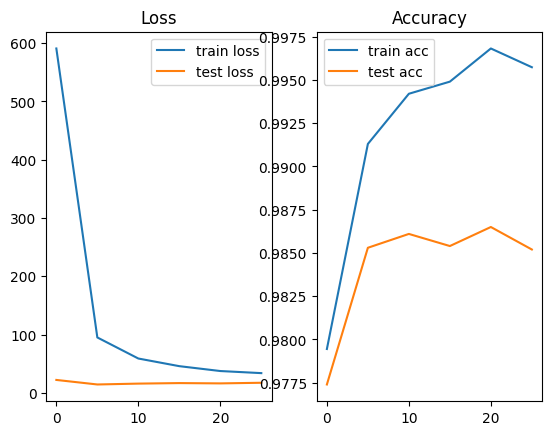

[590.776757906191, 94.97354364860803, 58.823631790830404, 45.70284754890963, 37.35197137048817, 33.76358928214904]
[22.077523013344035, 14.2838900143106, 15.777374019929994, 16.667044957290273, 16.15147876286119, 17.222887174799325]
[0.979449987411499, 0.9912999868392944, 0.9941999912261963, 0.9948999881744385, 0.9968166947364807, 0.9957333207130432]
[0.977400004863739, 0.9853000044822693, 0.9860999584197998, 0.9853999614715576, 0.9864999651908875, 0.9851999878883362]


In [ ]:
import torch
import torchvision
from models import lenet, vgg, resnet
from datasets import GetDataLoaders
from train import train, compute_accuracy, PlotCode
import torch.nn as nn
from tqdm.notebook import tqdm
import argparse
from pathlib import Path


device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
train_dataloader, test_dataloader = GetDataLoaders()
model = lenet.LeNet(1,10)
optimizer = torch.optim.SGD(model.parameters(), 0.1)
epochs = 26
train_loss, train_acc, test_loss, test_acc = adv_train(model, train_dataloader, test_dataloader, epochs, criterion, optimizer, device,5, 0.3, 2/255, True)
PlotCode(train_loss, train_acc, test_loss, test_acc, epochs)

print(train_loss)
print(test_loss)
print(train_acc)
print(test_acc)

In [ ]:
CalculateAccuracyAdversarial(test_dataloader, model, device, 5, 0.3, 2/255, True)

  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.52
After attack percentage: 97.56


(10000, 98.52, 97.56)

In [ ]:
CalculateAccuracyAdversarial(test_dataloader, model, device, 7, 0.3, 2/255, True)

  0%|          | 0/313 [00:00<?, ?it/s]

Total images: 10000
Actual percentage: 98.52
After attack percentage: 97.2


(10000, 98.52, 97.2)

In [ ]:
%%writefile adv_train.sh

python adv_train.py --model lenet --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim sgd --epsilon 0.3 --niter 5 --stepsize 2/255 --randinit
python adv_train.py --model lenet --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim adam --epsilon 0.3 --niter 5 --stepsize 2/255 --randinit
python adv_train.py --model lenet --dataset mnist --batch 32 --lr 0.1 --epochs 50 --optim sgd --epsilon 0.3 --niter 5 --stepsize 2/255 --randinit
python adv_train.py --model lenet --dataset mnist --batch 128 --lr 0.01 --epochs 50 --optim sgd --epsilon 0.3 --niter 5 --stepsize 2/255 --randinit
python adv_train.py --model lenet --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 1 --epsilon 0.3 --niter 5 --stepsize 2/255 --randinit
python adv_train.py --model lenet --dataset mnist --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 2 --epsilon 0.3 --niter 5 --stepsize 2/255 --randinit

python adv_train.py --model resnet --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim sgd --epsilon 0.03 --niter 5 --stepsize 2/255 --randinit
python adv_train.py --model resnet --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim adam --epsilon 0.03 --niter 5 --stepsize 2/255 --randinit
python adv_train.py --model resnet --dataset cifar --batch 32 --lr 0.1 --epochs 50 --optim sgd --epsilon 0.03 --niter 5 --stepsize 2/255 --randinit
python adv_train.py --model resnet --dataset cifar --batch 128 --lr 0.01 --epochs 50 --optim sgd --epsilon 0.03 --niter 5 --stepsize 2/255 --randinit
python adv_train.py --model resnet --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 1 --epsilon 0.03 --niter 5 --stepsize 2/255 --randinit
python adv_train.py --model resnet --dataset cifar --batch 32 --lr 0.01 --epochs 50 --optim sgd --scenario 2 --epsilon 0.03 --niter 5 --stepsize 2/255 --randinit


Writing adv_train.sh
